# 11Be particle gun generator

Let's do some nuclear particle emission



In [167]:
using Plots,Random

## Spherical neutron emission

We generate spherical coordinates $\theta$ and $\phi$ using random numbers

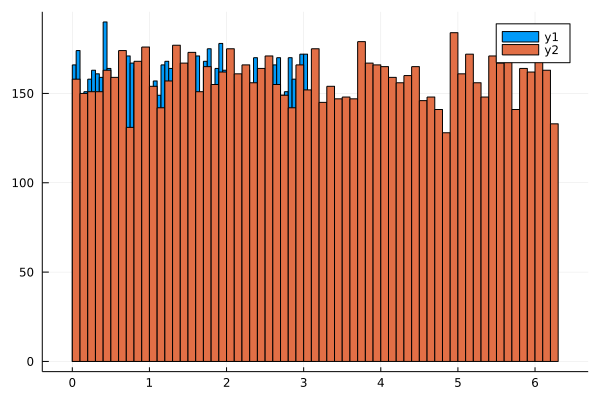

In [168]:
#neutron particle gun 

sampleSize=10000

#here random theta=[0,pi]

theta=pi*rand(sampleSize)

#here random phi=[0,2pi]

phi=2*pi*rand(sampleSize)

histogram(theta,bins=100)
histogram!(phi,bins=100)




Now we can add gaussian energy and momentum

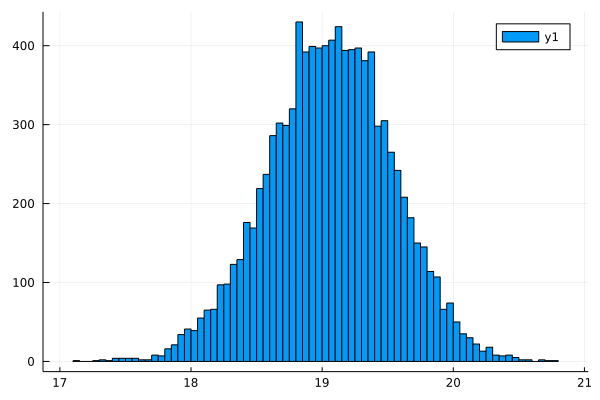

In [169]:
mn=1000;mb=10000
E = 0.2 .+ 0.01.*randn(sampleSize)
pn = sqrt.((2*mn*mb)/(mb+mn) .* E)

 histogram(pn,bins=100)


With all three values defined we store them in the `particleSample` dictionary, with each variable in its own collection.

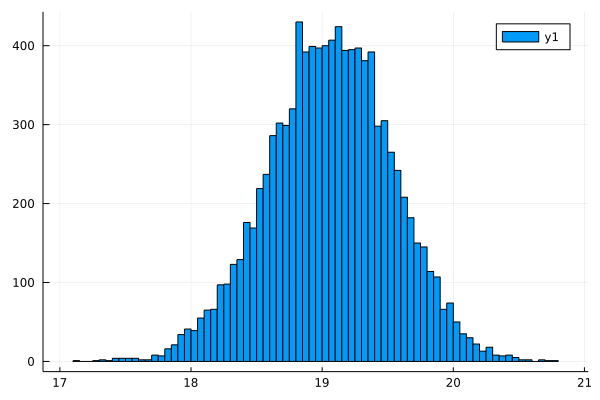

In [183]:

particleSample = Dict{String,Any}(
    "neutron"=>Dict{String,Any}("p"=>pn, "theta"=>theta, "phi"=> phi),
    "10be"=>Dict{String,Any}("p"=>pn, "theta"=> 3.1415.+theta, "phi"=> .-phi)   
        );
hiss=[]
for i in ["neutron","10be"] push!(hiss,get(get(particleSample,i,3),"p",3)) end

plot(hiss[1],hiss[2],seriestype=:histogram,bins=100)

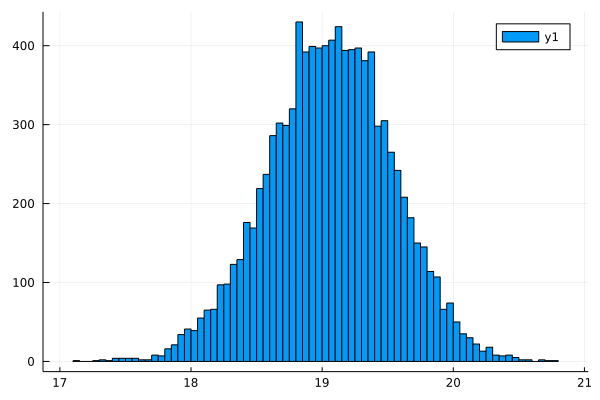

In [173]:
histogram(hiss[2],bins=100)